In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotilb inline 

UsageError: Line magic function `%matplotilb` not found.


In [17]:
train = pd.read_csv('titanic_train.csv') 

In [18]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
train.isnull().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


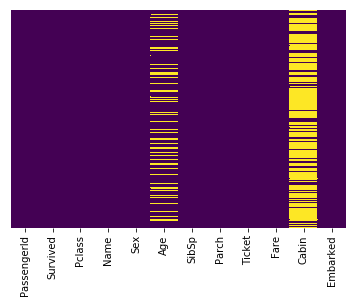

In [23]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

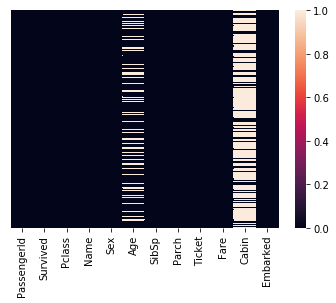

In [27]:
sns.heatmap(train.isnull(), yticklabels=False)

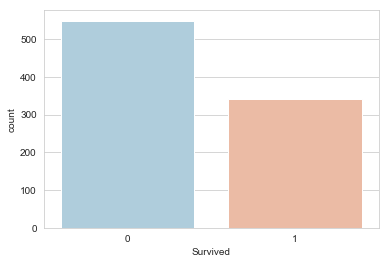

In [34]:
sns.countplot(x='Survived', data= train, palette='RdBu_r')
sns.set_style('whitegrid')

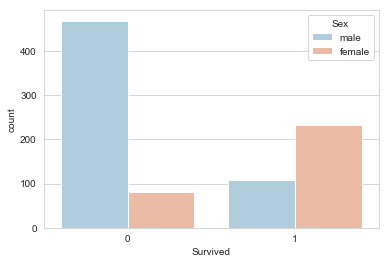

In [35]:
sns.countplot(x='Survived', hue='Sex',data= train, palette='RdBu_r')
sns.set_style('whitegrid')

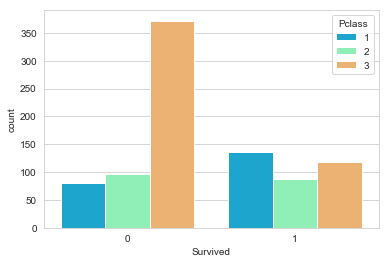

In [38]:
sns.countplot(x='Survived', hue='Pclass', data=train, palette='rainbow')

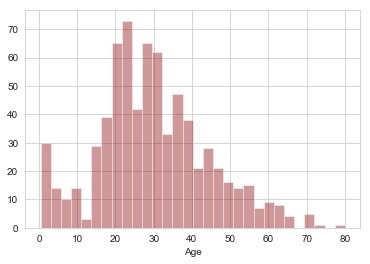

In [39]:
sns.distplot(train['Age'].dropna(), kde=False, color='darkred', bins=30)

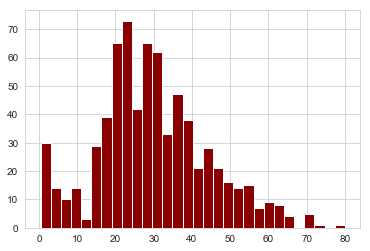

In [43]:
train['Age'].hist(bins=30, color='darkred', alpha=1) 

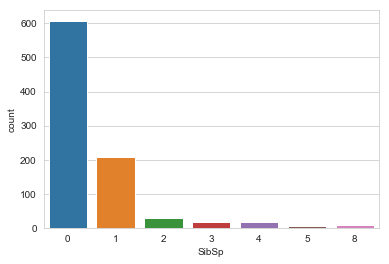

In [44]:
sns.countplot(x='SibSp', data=train) 

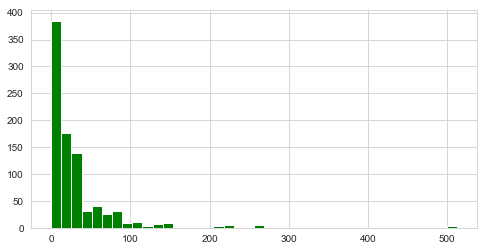

In [45]:
train['Fare'].hist(color='green', bins=40, figsize=(8,4))

In [ ]:
import cufflinks as cf
cf.go_offline() 
cf.set_config_file(offline=True) 

In [ ]:
# Iplot is not installed correctly thats why this line gives an error 
# so don't run this column 
train['Fare'].iplot(kind='hist', bins=30, color='green')

In [53]:
# Data Cleaning 

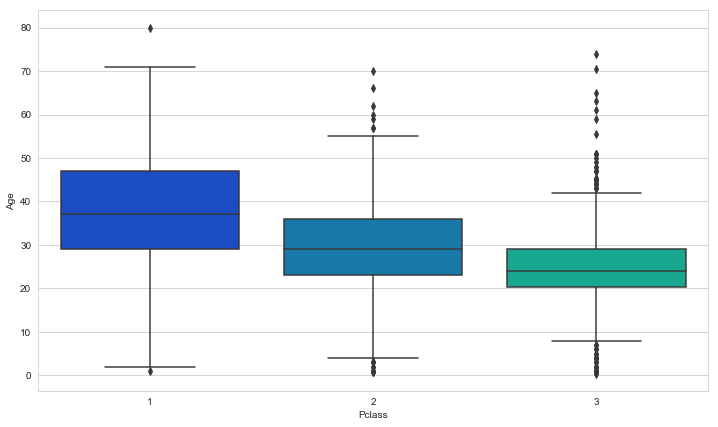

In [131]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')

In [132]:
def impute_age(cols):
    Age=cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        
        elif Pclass == 2 :
            return 29
        
        else:
            return 24
    
    else:
        return Age



In [133]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1)

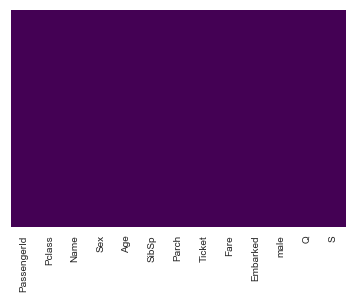

In [134]:
sns.heatmap(train.isnull(),cbar=False, yticklabels=False, cmap='viridis')

In [135]:
train.drop('Cabin', axis=1, inplace=True)

KeyError: "['Cabin'] not found in axis"

In [136]:
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [68]:
# Converting Category Feature

In [137]:
train.dropna(inplace=True)

In [138]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
male           889 non-null uint8
Q              889 non-null uint8
S              889 non-null uint8
dtypes: float64(2), int64(4), object(4), uint8(3)
memory usage: 79.0+ KB


In [144]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [147]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [149]:
Pcl = pd.get_dummies(train['Pclass'], drop_first=True)
Pcl.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [158]:
train = pd.concat([train, sex, embark,Pcl], axis = 1)

In [159]:
train.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
male           0
Q              0
S              0
male           0
Q              0
S              0
2              0
3              0
dtype: int64

In [160]:
train.drop(['Embarked'], axis=1, inplace=True)

KeyError: "['Embarked'] not found in axis"

In [161]:
train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S,2,3
0,1,3,22.0,1,0,7.2500,1,0,1,1,0,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1,0,0,1,0,1
3,4,1,35.0,1,0,53.1000,0,0,1,0,0,1,0,0
4,5,3,35.0,0,0,8.0500,1,0,1,1,0,1,0,1


In [153]:
from sklearn.model_selection import train_test_split

In [101]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, **options)>

In [121]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [130]:
X = train.drop(['Survived'], axis=1, inplace=True)
y = train['Survived']

KeyError: 'Survived'

In [ ]:
X = X.apply(pd.to_numeric, errors = 'coerce')
y = y.apply(pd.to_numeric, errors = 'coerce')

In [ ]:
X.dropna(inplace=True)
y.dropna(inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,  test_size=0.30, random_state=0)

In [114]:
# Training and Predicting 

In [122]:
from sklearn.linear_model import LogisticRegression

In [123]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



ValueError: could not convert string to float: 'S'

In [127]:
predictions = logmodel.predict(X_test)

NotFittedError: This LogisticRegression instance is not fitted yet

In [128]:
from sklearn.metrics import classification_report 

In [129]:
print(classification_report(y_test, predictions))

NameError: name 'predictions' is not defined

In [163]:
# Lecture completed

In [164]:
# PRACTICE EXERCISE 

In [165]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [169]:
data = pd.read_csv('advertising.csv')

In [170]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [173]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


Text(0.5, 0, 'Age')

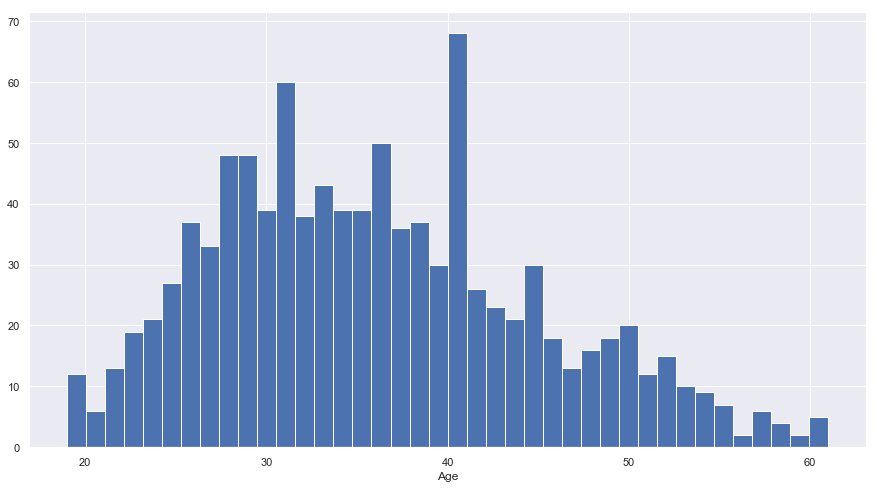

In [251]:
plt.figure(figsize=(15,8)) 
plt.hist(x=data.Age, data=data, bins = 40, label='Histogram')
plt.xlabel('Age')

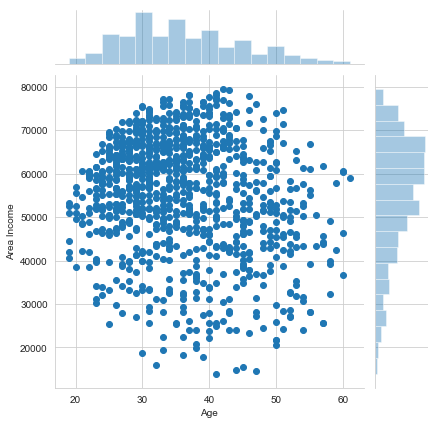

In [185]:
sns.jointplot(x='Age', y='Area Income', data=data)

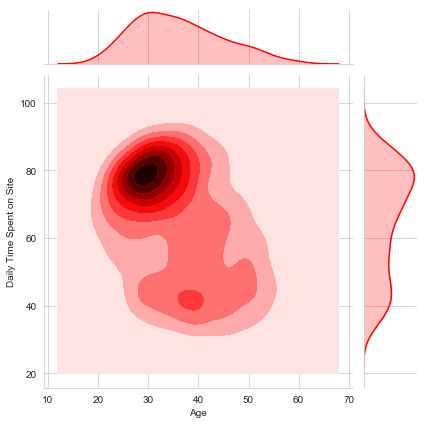

In [189]:
sns.jointplot(x='Age', y='Daily Time Spent on Site', data=data, kind='kde',color='red')

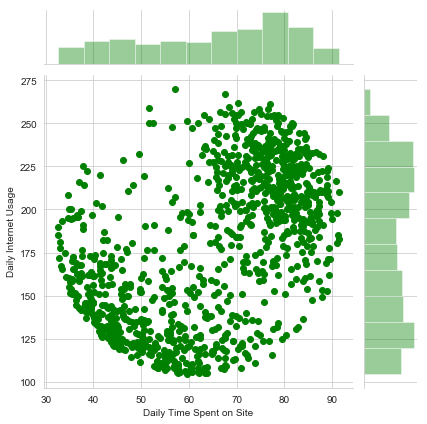

In [191]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage', data=data, color='green')

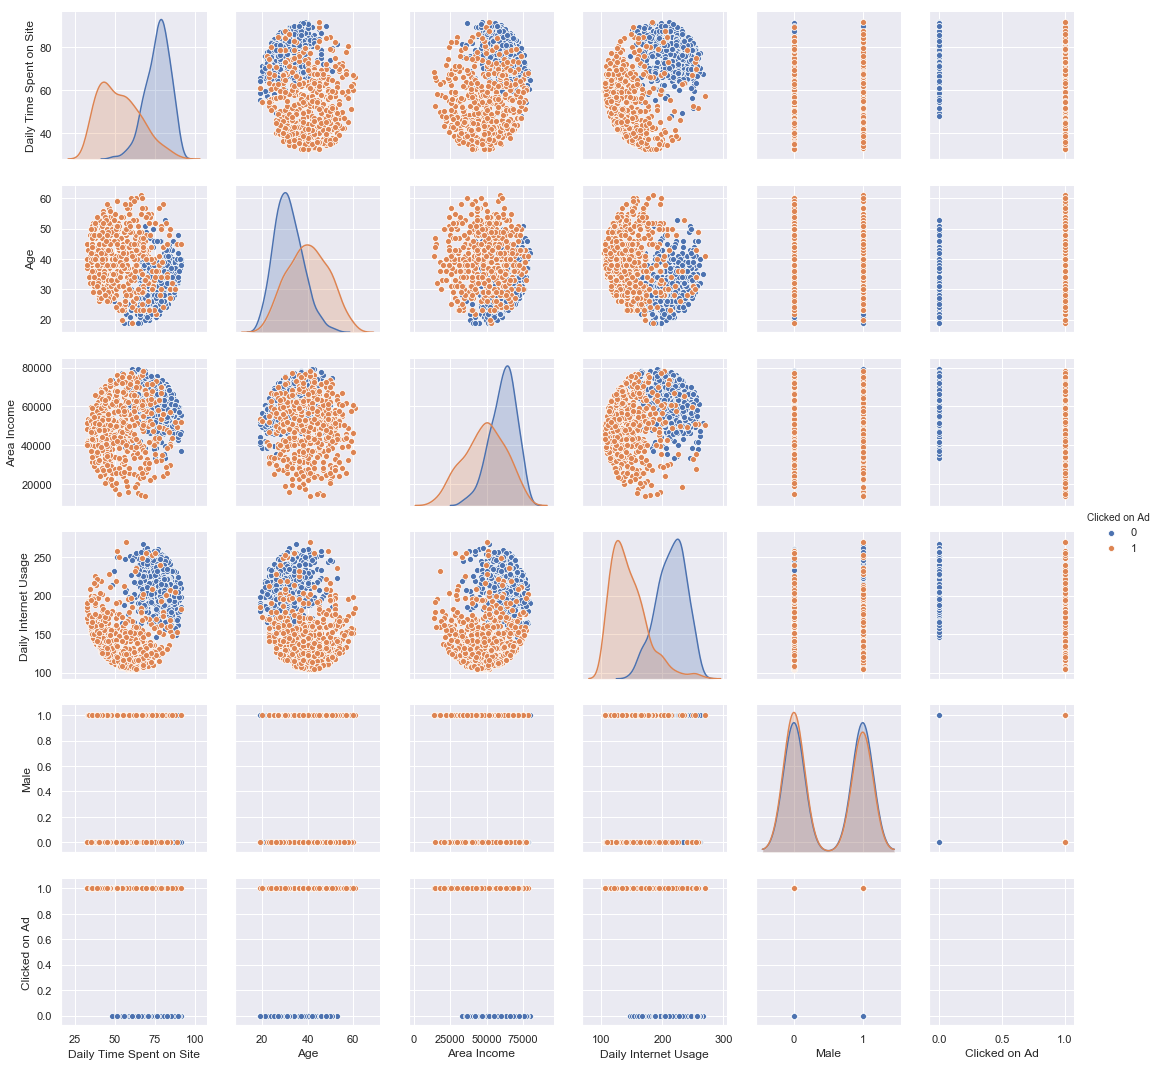

In [253]:
sns.pairplot(data=data, hue='Clicked on Ad')

In [237]:
X = data.iloc[:,[0,1,2,3,6,9]]

In [238]:
y = data['Clicked on Ad']

In [239]:
from sklearn.model_selection import train_test_split

In [240]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, **options)>

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [242]:
from sklearn.linear_model import LogisticRegression

In [243]:
model = LogisticRegression()

In [244]:
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [245]:
prediction = model.predict(X_test)

In [246]:
prediction

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,

In [247]:
from sklearn.metrics import classification_report

In [249]:
classification_report(y_test, prediction)

'              precision    recall  f1-score   support\n\n           0       0.87      0.96      0.91       162\n           1       0.96      0.86      0.91       168\n\n   micro avg       0.91      0.91      0.91       330\n   macro avg       0.92      0.91      0.91       330\nweighted avg       0.92      0.91      0.91       330\n'